        CUSTOMER CHURN PREDICTION MACHINE LEARNING PROJECT

INTRODUCTION
In the fast-evolving telecommunications industry, addressing customer churn has become a critical focus for strategic initiatives. The Telco Customer Churn Mitigation Project is a comprehensive effort to understand, analyze, and reduce customer attrition within our telecommunications services. By leveraging machine learning techniques, we aim to predict which customers are likely to churn and develop proactive measures to retain them.

PROJECT OBJECTIVES
This project aims to build a machine learning model that predicts the likelihood of a customer churning. We will analyze three datasets from Vodafone telecommunications to uncover patterns and insights.

HYPOTHESES
Null Hypothesis: There is no significant relationship between the likelihood of a customer churning and factors such as payment methods, contract types, and gender.

Alternative Hypothesis: There is a significant relationship between the likelihood of a customer churning and factors such as payment methods, contract types, and gender.

ANALYTICAL QUESTIONS AND INSIGHTS
1.Which payment method has the highest churn?
Understanding the payment methods most associated with churn can help tailor retention strategies. Identifying the highest risk payment methods allows for targeted interventions to improve customer satisfaction and reduce churn.

2.What is the churn rate among senior citizens?
Analyzing churn rates among senior citizens can reveal age-related patterns in customer behavior. Insights from this analysis can guide the development of age-specific retention programs to better address the needs and preferences of senior customers.


3.Are customers with fiber optic internet more likely to churn compared to DSL users?
Comparing churn rates between fiber optic and DSL users can highlight the impact of internet service type on customer retention. These insights can inform decisions on infrastructure investments and service offerings to improve overall customer satisfaction.

4.Which gender are likely to churned more?
Examining churn rates by gender can uncover any gender-specific trends in customer attrition. This information can be used to create personalized retention strategies that address the unique needs and preferences of different gender groups.

5.How does the contract duration affect the likelihood of a customer churning?
Analyzing the relationship between contract duration and churn likelihood can provide valuable insights into customer commitment levels. Longer contracts might indicate higher loyalty, while shorter contracts could suggest a higher risk of churn. This knowledge can inform contract structuring and renewal strategies to enhance customer retention.







IMPORT ALL THE REQUIRED LIBRARIES.

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import PowerTransformer

In [3]:
#Machine learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC 

In [4]:
%pip install pyodbc
%pip install python-dotenv
from dotenv import dotenv_values
import pyodbc
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#load environment viarables from .env
environment_variables= dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user") 
password = environment_variables.get("password")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=y"
connection = pyodbc.connect(connection_string)



In [6]:
query= 'Select * from dbo.LP2_Telco_churn_first_3000'

data1= pd.read_sql(query,connection)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7244\3580490053.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1= pd.read_sql(query,connection)


In [7]:
search_directory = r'C:\Users\DELL\Downloads\PROJECT@AZUBI\CUSTOMER-CHURN-PREDICTION'
file_name = 'Telco-churn-first-3000'
file_path = f'{search_directory}\\{file_name}'

data1.to_csv(file_path, index=False)

In [8]:
data2=pd.read_csv('LP2_Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
data3=pd.read_excel('Telco-churn-last-2000.Xlsx')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


INSPECTING THE LOADED DATASETS

Preview the dataset by utilizing the info(), isnull(), and duplicated() methods. This approach provides a comprehensive overview of the dataset's structure, missing values, and duplicate records.

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
data1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [13]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


OBSERVATIONS

1.Some columns contain null values.
2.The 'Total Charges' column is in an object format.

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [15]:
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2038    False
2039    False
2040    False
2041    False
2042    False
Length: 2043, dtype: bool

In [17]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


OBSERVATIONS

1. The 'Total charges' columns is in an object format

In [18]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [19]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [20]:
data3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [21]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


OBSERVATIONS
1 The 'Total charges' column is in a string format

EXAMINE EACH COLUMN IN THE FIRST DATASET TO IDENTIFY ANY ANOMALIES.

In [22]:
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


OBSERVATIONS

It is noticeable that most of the columns are in boolean format and need to be standardized into string format.

In [23]:
# convert boolean values in the senior citizen column to strings
data1['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

# convert boolean values in the partner column to strings
data1['Partner']= data1['Partner'].replace({False:'No', True:'Yes'})

# convert boolean values in the dependants column to strings
data1['Dependents']= data1['Dependents'].replace({False:'No', True:'Yes'})

# convert boolean values in the phone service column to strings
data1['PhoneService']= data1['PhoneService'].replace({False:'No', True:'Yes'})

# convert boolean values in the MultipleLines column to strings
data1['MultipleLines']= data1['MultipleLines'].replace({False:'No', True:'Yes', None:'No phone service'})

# convert boolean values in the OnlineSecurity column to strings
data1['OnlineSecurity']= data1['OnlineSecurity'].replace({False:'No', True:'Yes', None:'No internet service'})


In [24]:
# convert boolean values in the OnlineBackup column to strings
data1['OnlineBackup']= data1['OnlineBackup'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the DeviceProtection column to strings
data1['DeviceProtection']= data1['DeviceProtection'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the TechSupport column to strings
data1['TechSupport']= data1['TechSupport'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingTV column to strings
data1['StreamingTV']= data1['StreamingTV'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingMovies column to strings
data1['StreamingMovies']= data1['StreamingMovies'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the PaperlessBilling column to strings
data1['PaperlessBilling']= data1['PaperlessBilling'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the Churn column to strings
data1['Churn']= data1['Churn'].replace({False:'No', True:'Yes'})

CONVERT THE 'SENIOR CITIZEN' COLUMN IN BOTH DATA2 AND DATA3 TO STRING VALUES.

In [25]:
# Replace int values in the senior citizen column of data2 to string values
data2['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

# Replace int values in the senior citizen column of data3 to string values
data3['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

RENAME CERTAIN COLUMNS TO A STANDARDIZED FORMAT.

In [26]:
#Rename the customerID, gender and tenure columns in data1
data1= data1.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

#Rename the customerID, gender and tenure columns in data2
data2= data2.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

#Rename the customerID, gender and tenure columns in data3
data3= data3.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

DROP NULL VALUES IN THE CHURN COLUMN OF DATA1 AND CONFIRM THE RESULTS

In [27]:
# Drop rows with NaN values in the 'Churn' column
data1.dropna(subset=['Churn'], inplace=True)
data1['Churn'].isnull().sum()


0

MERGED DATA1 AND DATA2 FOR FURTHER ANALYSIS.


In [36]:
# merged data1 and data2 for further analysis and training
merged_data= pd.concat([data1, data2])
merged_data

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,No,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


CONVERT MERGED DATA TO A CSV FILE

In [42]:
search_directory = r'C:\Users\DELL\Downloads\PROJECT@AZUBI\CUSTOMER-CHURN-PREDICTION\Notebook'
file_name = 'Cleaned_dataset'
file_path = f'{search_directory}\\{file_name}'

merged_data.to_csv(file_path, index=False)

In [44]:
cleaned_dataset= pd.read_csv('Cleaned_data')
cleaned_dataset

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5038,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5039,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5040,8361-LTMKD,Male,No,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


DATA UNDERSTANDING OF CLEANED DATA

UNIVARIATE ANALYSIS

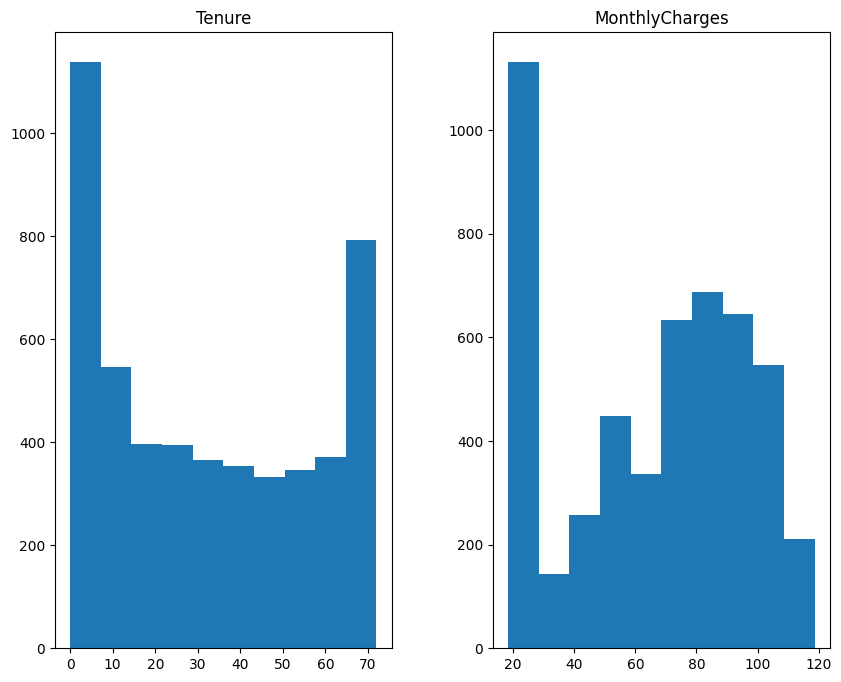

In [45]:
cleaned_dataset.hist(figsize=(10, 8), grid=False)
plt.show()

OBSERVATIONS

1.The Tenure column exhibits a bimodal distribution.
2.The Total Charges column shows a positive skew.








BIVARIATE ANALYSIS

<Axes: >

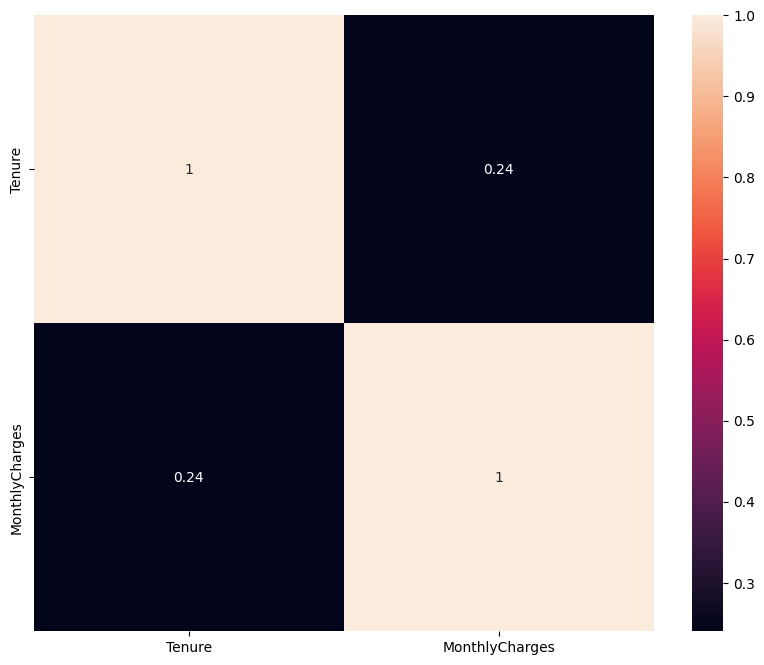

In [46]:

correlation= cleaned_dataset.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation, annot=True)

PREVIEW CLEANED DATA



In [47]:
#Check basic information of the data using the info method
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5042 non-null   object 
 1   Gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   Tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   object 
 10  OnlineBackup      5042 non-null   object 
 11  DeviceProtection  5042 non-null   object 
 12  TechSupport       5042 non-null   object 
 13  StreamingTV       5042 non-null   object 
 14  StreamingMovies   5042 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 


In [48]:
cleaned_dataset.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438,Yes


In [49]:
cleaned_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5042.0,32.568822,24.525954,0.0,9.0000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.4,35.7625,70.550003,90.050002,118.650002


In [50]:
cleaned_dataset.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [51]:
cleaned_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5037    False
5038    False
5039    False
5040    False
5041    False
Length: 5042, dtype: bool

1.Which payment method has the highest churn?
Understanding the payment methods most associated with churn can help tailor retention strategies. Identifying the highest risk payment methods allows for targeted interventions to improve customer satisfaction and reduce churn.

In [52]:
# Group by PaymentMethod and calculate the churn rates(normalize=True).unstack() for each method
payment_churn = cleaned_dataset.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()


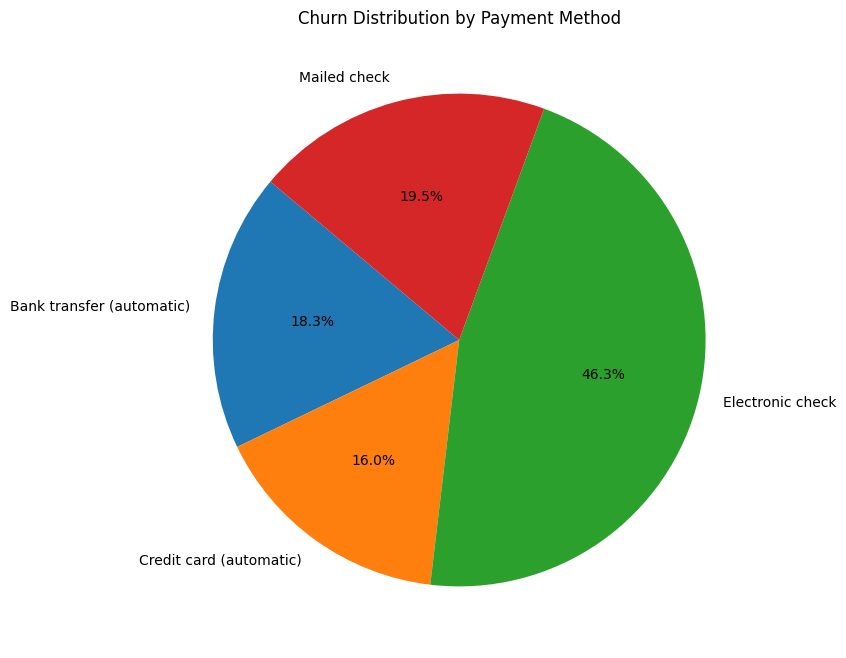

The payment method with the highest churn is: Electronic check


In [53]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_churn['Yes'], labels=payment_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Payment Method')
plt.show()

# Identify the payment method with the highest churn
highest_churn_method = payment_churn['Yes'].idxmax()

# Print the payment method with the highest churn
print(f"The payment method with the highest churn is: {highest_churn_method}")



Insights and Recommendations

High Churn with Electronic Checks:

Observation: The payment method "Electronic check" shows the highest customer turnover rate (754). This indicates a significant trend where customers using electronic checks are more prone to churn compared to other payment methods.
Implication: The choice of electronic checks might be linked to certain issues or inconveniences that lead to customer dissatisfaction and ultimately result in higher churn rates.

Lower Turnover with Automatic Payments:

Observation: Customers using "Credit card (automatic)" and "Bank transfer (automatic)" experience significantly lower turnover counts.
Implication: These automatic payment methods appear to be more reliable or convenient, contributing to better customer retention. Automatic payments might offer ease and consistency, making them more attractive to customers and reducing the likelihood of churn.

Moderate Churn with Mailed Checks:

Observation: The churn rate for "Mailed check" is moderate, indicating an intermediate level of customer attrition.
Implication: While not as prone to churn as electronic checks, mailed checks still have a noticeable turnover rate. This suggests that while some customers find this method acceptable, it is not as effective in retaining customers as automatic payment options.

Influence of Payment Methods on Retention:

Observation: The data suggests a correlation between the type of payment method and customer retention rates.
Implication: Businesses should delve deeper into understanding why certain payment methods like electronic checks lead to higher churn. Identifying and addressing the underlying causes could significantly enhance customer retention.

Improving Electronic Check Processes:

Observation: The high churn associated with electronic checks highlights a potential area for improvement.
Recommendation: Businesses should review and optimize the processes involved with electronic check payments. This could include providing incentives, streamlining the payment process, or offering enhanced services to make electronic checks more appealing and user-friendly, thereby boosting customer retention.

Strategic Focus:

Recommendation: Prioritize understanding the reasons behind the high churn with electronic checks. Implement targeted strategies to address these issues, potentially increasing overall customer satisfaction and reducing churn rates.
Action Plan: Conduct customer surveys, analyze feedback, and investigate the specific pain points associated with electronic check payments. Use these insights to develop and implement effective retention strategies.









2.What is the churn rate among senior citizens?
Analyzing churn rates among senior citizens can reveal age-related patterns in customer behavior. Insights from this analysis can guide the development of age-specific retention programs to better address the needs and preferences of senior customers.

In [54]:
# Filter the dataframe to include only senior citizens
senior_citizen = cleaned_dataset[cleaned_dataset['SeniorCitizen'] == 'Yes']
 
 #check for churn counts among senior citizens
churn=senior_citizen['Churn'].value_counts(normalize=True)*100
churn= churn.reset_index() 
churn 

,Churn,proportion
0,No,65.83229
1,Yes,34.16771


<function matplotlib.pyplot.show(close=None, block=None)>

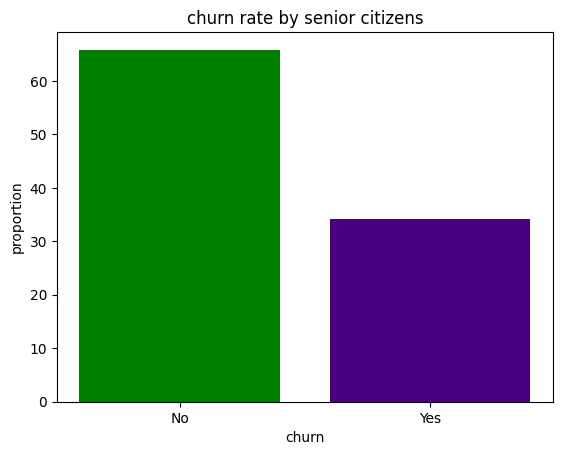

In [55]:
#plot a bar chart to  visualise the above code
plt.bar(churn['Churn'], churn['proportion'], color=['green', 'indigo'])
#Add labels and title
plt.xlabel('churn')
plt.ylabel('proportion')
plt.title('churn rate by senior citizens')

#Display the plot
plt.show

Insights

Churn Rate Analysis:

Observation: The data indicates that (34.17%) of customers have churned, while (65.83%) have remained. This demonstrates that a significant portion of the customer base is retained.
Implication: While the majority of customers have not churned, the churn rate is still substantial enough to warrant attention. It is essential to delve deeper into the factors contributing to this churn to mitigate future losses.

Understanding Churn Dynamics:

Observation: The sizable proportion of churned customers highlights the importance of comprehending the underlying reasons for their departure.
Implication: Identifying and addressing the specific causes of churn is crucial. This understanding can help in developing targeted strategies to improve retention rates and reduce the overall churn percentage.

Churn Impact:

Observation: The unbalanced nature of the churn data, with over one-third of customers leaving, suggests there are significant issues that need to be resolved.
Implication: Businesses should prioritize a detailed analysis of churn drivers, such as service quality, customer satisfaction, and competitive offerings. By addressing these areas, businesses can enhance their retention strategies.

Strategic Recommendations:

Recommendation: Implement comprehensive customer feedback mechanisms to identify pain points. Analyze trends and patterns in customer behavior to pinpoint the main factors contributing to churn.
Action Plan: Use data analytics to segment customers based on churn risk, and develop customized retention strategies for high-risk groups. Enhance customer support, improve service offerings, and consider loyalty programs to retain customers more effectively.

Future Focus:

Recommendation: Continuously monitor churn rates and customer satisfaction metrics. Regularly update strategies based on feedback and changing market dynamics to ensure ongoing improvements in customer retention.









3.Are customers with fiber optic internet more likely to churn compared to DSL users?
Comparing churn rates between fiber optic and DSL users can highlight the impact of internet service type on customer retention. These insights can inform decisions on infrastructure investments and service offerings to improve overall customer satisfaction.


In [56]:
# Group the data by InternetService and calculate the churn rate for each group
internet_churn_group = cleaned_dataset.groupby('InternetService')['Churn'].value_counts(normalize=True)

# Extract churn rates for Fiber optic and DSL users
fiber_optic_churn_rate = internet_churn_group.loc['Fiber optic', 'Yes']
dsl_churn_rate = internet_churn_group.loc['DSL', 'Yes']
internet_churn_group 


InternetService  Churn
DSL              No       0.819825
                 Yes      0.180175
Fiber optic      No       0.576769
                 Yes      0.423231
No               No       0.929630
                 Yes      0.070370
Name: proportion, dtype: float64

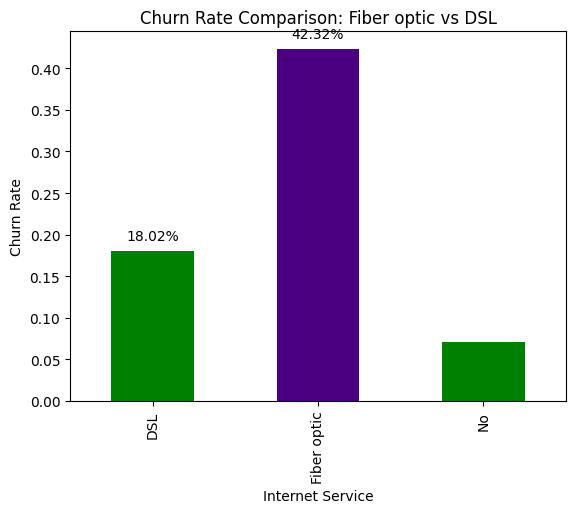

In [57]:
# Create a bar chart to visualize the churn rates
fig, ax = plt.subplots()
internet_churn_group.loc[:, 'Yes'].plot(kind='bar', ax=ax, color=['green', 'indigo'])
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Internet Service')
ax.set_title('Churn Rate Comparison: Fiber optic vs DSL')


# Annotate the bars with the churn rates
for i, value in enumerate([dsl_churn_rate,fiber_optic_churn_rate]):
    ax.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom')

plt.show()

Churn Rates

Comparison of Churn Rates:

Observation: Customers using Fiber Optic services exhibit a higher churn rate of 42.32%, whereas those using DSL services have a much lower churn rate of 18.02%.
Implication: The significant difference in churn rates between Fiber Optic and DSL customers suggests that there are distinct issues or dissatisfaction levels associated with Fiber Optic services.

Insights into Service Performance:

Observation: The elevated churn rate among Fiber Optic customers might indicate performance or reliability issues, higher costs, or unmet expectations.
Implication: To address this disparity, it is crucial to investigate the specific challenges faced by Fiber Optic users. Understanding these factors can lead to targeted improvements in service quality, pricing strategies, or customer support for Fiber Optic services.

Customer Retention Strategies:

Observation: The lower churn rate among DSL customers suggests that this service meets customer expectations more effectively.
Implication: The strategies and practices that have contributed to higher retention rates in DSL services could potentially be adapted and applied to Fiber Optic services. This might include improving reliability, adjusting pricing, or enhancing customer service.

Strategic Recommendations:

Recommendation: Conduct detailed surveys and gather feedback from Fiber Optic customers to identify the key pain points. Analyze the data to understand why DSL customers are more satisfied and less likely to churn.
Action Plan: Use these insights to enhance the Fiber Optic service experience. This could involve technical improvements, better customer support, competitive pricing, or added value services to reduce churn rates among Fiber Optic customers.

Long-term Focus:

Recommendation: Continuously monitor the performance and customer satisfaction levels of both Fiber Optic and DSL services. Regular updates and improvements based on customer feedback and industry trends can help maintain low churn rates and enhance overall customer satisfaction.







4.Which gender are likely to churned more?
Examining churn rates by gender can uncover any gender-specific trends in customer attrition. This information can be used to create personalized retention strategies that address the unique needs and preferences of different gender groups.

In [58]:
gender_churn = cleaned_dataset.groupby('Gender')['Churn'].value_counts().unstack()
gender_churn


Churn,No,Yes
Gender,,
Female,1823,661
Male,1883,675


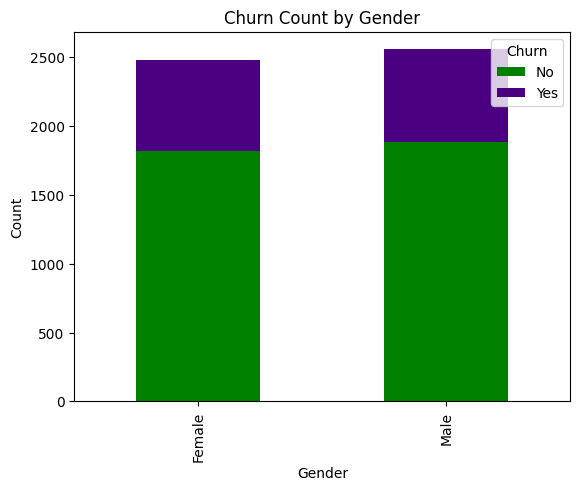

In [59]:
gender_churn = cleaned_dataset.groupby('Gender')['Churn'].value_counts().unstack()

# Plot a bar chart
gender_churn.plot(kind='bar', stacked=True, color=['green', 'indigo'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

Gender-Based Churn Rate Analysis

Observation from the Stacked Bar Chart:

Observation: The churn rate between male and female customers does not show a significant difference.
Insight: While males appear to have a slightly higher churn rate, the variation is not substantial enough to indicate a clear gender-based trend in customer attrition.

Detailed Analysis:

Observation: The data reveals that both male and female customers experience similar rates of churn.
Implication: Gender does not seem to be a major factor influencing customer churn. The slight edge in churn rate for males suggests only a marginal difference, indicating that other factors are likely more influential in driving customer turnover.

Strategic Considerations:

Recommendation: Focus on universal factors affecting churn rather than targeting gender-specific strategies. Investigate other demographic, behavioral, or service-related aspects that might have a more pronounced impact on churn rates.
Action Plan: Implement broad-based retention strategies that address common pain points and enhance overall customer satisfaction, rather than tailoring efforts specifically by gender.







5.How does the contract duration affect the likelihood of a customer churning?
Analyzing the relationship between contract duration and churn likelihood can provide valuable insights into customer commitment levels. Longer contracts might indicate higher loyalty, while shorter contracts could suggest a higher risk of churn. This knowledge can inform contract structuring and renewal strategies to enhance customer retention.

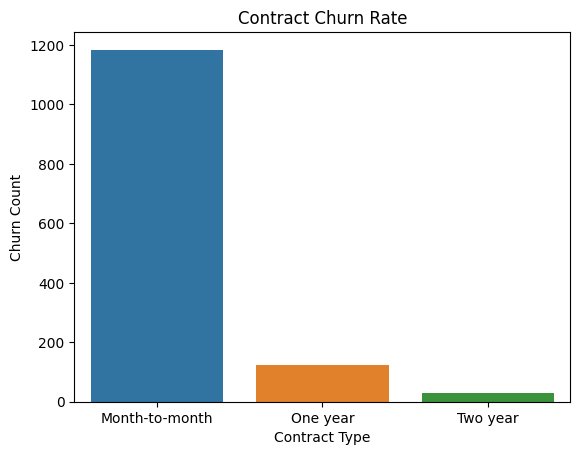

In [60]:
# Calculate churn rate by contract duration
contract_churn_rate = cleaned_dataset.groupby('Contract')['Churn'].value_counts().unstack()


sns.barplot(x=contract_churn_rate.index, y='Yes', data=contract_churn_rate.reset_index(), hue='Contract')
plt.title('Contract Churn Rate')
plt.xlabel('Contract Type')
plt.ylabel('Churn Count')
plt.show()

Insights

High Churn in Month-to-Month Subscriptions:

Observation: Customers with month-to-month subscriptions exhibit the highest churn rates.
Implication: The flexibility of month-to-month plans, while attractive for some customers, may lead to higher churn because it allows for easier cancellation compared to longer-term commitments.
Insight: This pattern suggests that customers on month-to-month plans might be less satisfied or less committed to the service, possibly due to perceived lower value, price sensitivity, or frequent service issues.

Detailed Analysis:

Observation: The data clearly indicates that month-to-month subscribers are more likely to leave compared to those with longer-term contracts.
Implication: The convenience of month-to-month plans may attract customers who are less loyal or more willing to switch providers if they encounter any dissatisfaction.
Insight: Addressing the reasons for this high churn rate among month-to-month customers could significantly improve overall retention rates.

Strategic Recommendations:

Recommendation: Investigate the specific reasons behind the high churn rates among month-to-month subscribers. This could involve customer surveys, feedback forms, and detailed analysis of service usage patterns.

Action Plan: Develop strategies to enhance the value proposition for month-to-month subscribers. Consider offering incentives for longer commitments, improving service quality, or providing exclusive benefits to retain these customers.

Long-Term Focus: Continuously monitor the churn rates across different subscription plans. Use this data to refine retention strategies and ensure that month-to-month subscribers receive compelling reasons to stay loyal to the service.











DATA PREPARATION

SPLIT DATA INTO INPUT(X) AND TARGET(Y)

In [61]:
#split data into input(x) and target(y)
x = cleaned_dataset.drop('Churn', axis=1)

In [62]:
y = cleaned_dataset['Churn']

SPLIT DATA INTO TRAINING AND EVALUATION

In [63]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size= 0.2, random_state=47, stratify=y)

Feature Engineering
Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. This process can include:

1. Creating New Features: Combining existing data in novel ways to generate new insights.
2. Transforming Data: Applying mathematical or statistical transformations to make data more suitable for modeling.
3. Handling Missing Values: Filling in or estimating missing data to maintain dataset integrity.
4.Encoding Categorical Data: Converting categorical variables into numerical formats that machine learning models can process.
5. Scaling and Normalizing: Adjusting data scales to ensure uniformity and improve model performance.
Effective feature engineering enhances the predictive power and accuracy of machine learning algorithms.

In [64]:
# Define preprocessing steps for numerical and categorical features
numerical_features = x.select_dtypes(include='number').columns
categorical_features = x.select_dtypes(include='object').columns

In [65]:
# Create a pipeline for both numerical and categorical data

numerical_data= Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    
])

In [66]:
categorical_data= Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore')),
    
    
])

In [67]:
Preprocessor= ColumnTransformer([
    ('numerical',numerical_data,numerical_features ),
    ('categorical',categorical_data,categorical_features)

])

Label Encoding
Label encoding is a technique used to convert categorical data into numerical format so that machine learning algorithms can process it. This involves assigning a unique integer to each category or label in the dataset. For instance, if you have a column with the categories 'red', 'blue', and 'green', label encoding might transform these into 1, 2, and 3, respectively. This method is straightforward and useful for converting categorical variables into a format that can be directly used by machine learning models.

In [68]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)

In [69]:
y_train.value_counts()

Churn
No     2964
Yes    1069
Name: count, dtype: int64

MACHINE LEARNING MODELLING-IMBALANCED DATASET

1.Decision tree
2.Random forest
3.Knn model
4.Gradient Descent model

In [72]:
# decision tree pipeline
decision_tree= Pipeline([
    ('preprocessor',Preprocessor ),
    ('classifier', DecisionTreeClassifier(random_state=42))

])

# Random Forest Pipeline
random_forest = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# KNN model
knn_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Gradient Descent model (Gradient Boosting)
gradient_descent_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', GradientBoostingClassifier())
])

TRAIN ALL MODELS

In [73]:
decision_tree.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [75]:
random_forest.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [76]:
knn_model.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [77]:
gradient_descent_model.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

PREDICT AND GENERATE A CLASSIFICATION REPORT FOR ALL MODELS

In [78]:
decision_tree_pred = decision_tree.predict(x_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test_encoded, decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.53      0.56       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009



For class 0, the model achieves a strong F1-score of 0.85, indicating high precision and recall. In contrast, the F1-score for class 1 is 0.56, highlighting weaknesses in both precision and recall. This disparity suggests that while the model is effective at predicting class 0, it struggles significantly with class 1, pointing to a need for targeted improvements in handling this class to enhance overall model performance.

In [79]:
random_forest_pred = decision_tree.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test_encoded, random_forest_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.53      0.56       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009



The Random Forest model achieves a slightly higher F1-score for class 0 (0.87) compared to the Decision Tree (0.85). For class 1, the F1-scores are comparable, with the Random Forest scoring 0.54 and the Decision Tree scoring 0.56. Overall, the Random Forest model performs similarly to, or marginally better than, the Decision Tree model. It offers improved precision for class 1, a higher overall accuracy, and slightly better macro-averaged precision. Further analysis, including feature importance evaluation and hyperparameter tuning, will be conducted to further enhance the model's performance and address areas where it currently underperforms.

In [80]:
knn_pred = knn_model.predict(x_test)
print("knn Classification Report:")
print(classification_report(y_test_encoded, decision_tree_pred))

knn Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.53      0.56       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009



1.The KNN model demonstrates lower precision and recall for both classes when compared to the Decision Tree and Random Forest models.

2.Its F1-scores for both classes are also notably lower.

3.The overall accuracy of the KNN model is 0.75, which is lower than the Random Forest's 0.79 but similar to the Decision Tree's 0.78.

In summary, the classification report indicates that while the KNN model is competitive, its performance is generally inferior to that of the Decision Tree and Random Forest models. This suggests that KNN may not be the best choice for this specific task, given its relatively lower precision, recall, and F1-scores across both classes. Further investigation into model optimization and parameter tuning for KNN might be necessary to improve its performance.

In [81]:
gradient_descent_pred = gradient_descent_model.predict(x_test)
print("\nGradient Descent Classification Report:")
print(classification_report(y_test_encoded, gradient_descent_pred))


Gradient Descent Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       742
           1       0.65      0.46      0.54       267

    accuracy                           0.79      1009
   macro avg       0.74      0.69      0.70      1009
weighted avg       0.78      0.79      0.78      1009



The model exhibits strong performance for class 0, achieving an F1-Score of 0.87, which indicates high precision and recall. This suggests that the model is highly effective at correctly identifying instances of class 0 and has a low rate of false positives and false negatives for this class. In contrast, the model's performance for class 1 is less robust, with an F1-Score of 0.54. This lower score reflects challenges in recall, indicating that the model is less capable of identifying all relevant instances of class 1, leading to a higher rate of false negatives. This discrepancy highlights the need for further optimization or additional data to improve the model's ability to correctly classify instances of class 1.

COMPARE ALL YOUR MODELS

In [82]:
# Train and evaluate the models

models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model
}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train_encoded)

    # Make predictions
    y_pred = model.predict(x_test)

    # Create a classification report
    report = classification_report(y_test_encoded, y_pred)
    print(f"Classification Report for {name}:\n{report}")
    print('='* 50)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.53      0.56       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       742
           1       0.65      0.47      0.54       267

    accuracy                           0.79      1009
   macro avg       0.74      0.69      0.70      1009
weighted avg       0.78      0.79      0.78      1009

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       742
           1       0.52      0.52      0.52       267

    accuracy                           0.75      1009
   macro avg   

Based on the F1-score for the positive class (class 1), the Decision Tree model stands out with the highest value of 0.56, indicating it is the most effective at balancing precision and recall for this class. Both the Random Forest and Gradient Descent models follow closely, each with an F1-score of 0.54. This suggests that while these models perform similarly in terms of identifying true positives and minimizing false positives and false negatives for class 1, the Decision Tree model slightly outperforms them. Therefore, the Decision Tree is the top model for class 1, with the Random Forest and Gradient Descent models as the next best options. This insight is crucial for selecting the most appropriate model, especially in applications where correctly identifying the positive class is critical.

BALANCING DATASET USING RANDOM OVERSAMPLER

In [83]:
sampler= RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = sampler.fit_resample(x_train,y_train_encoded)


models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model
}

for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, Y_train_resampled)

    # Make predictions
    y_pred = model.predict(x_test)

    # Create a classification report
    report = classification_report(y_test_encoded, y_pred)
    print(f"Classification Report for {name}:\n{report}")
    print('='* 50)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       742
           1       0.54      0.63      0.58       267

    accuracy                           0.76      1009
   macro avg       0.70      0.72      0.71      1009
weighted avg       0.77      0.76      0.77      1009

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       742
           1       0.59      0.63      0.61       267

    accuracy                           0.79      1009
   macro avg       0.73      0.74      0.73      1009
weighted avg       0.79      0.79      0.79      1009

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       742
           1       0.43      0.74      0.54       267

    accuracy                           0.67      1009
   macro avg   

MODEL EVALUATION

VISUALIZE CONFUSION MATRIX

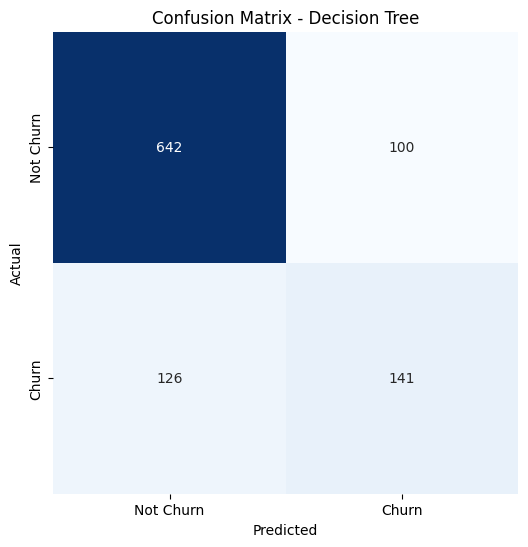

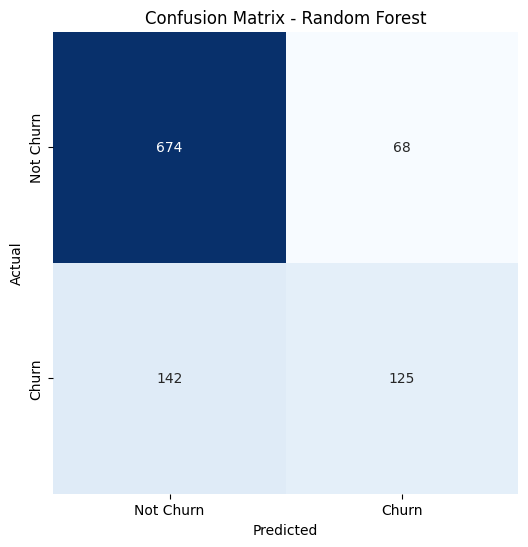

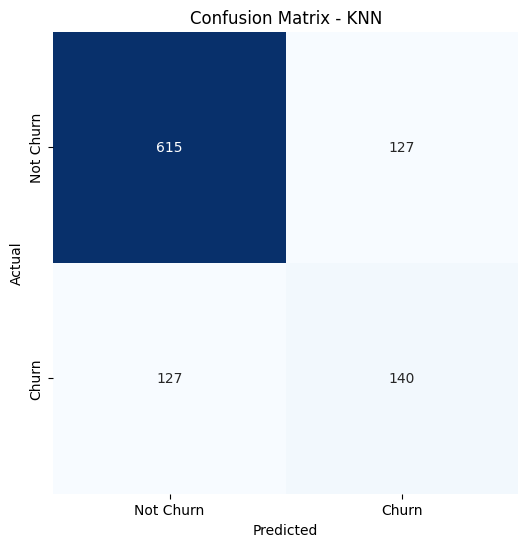

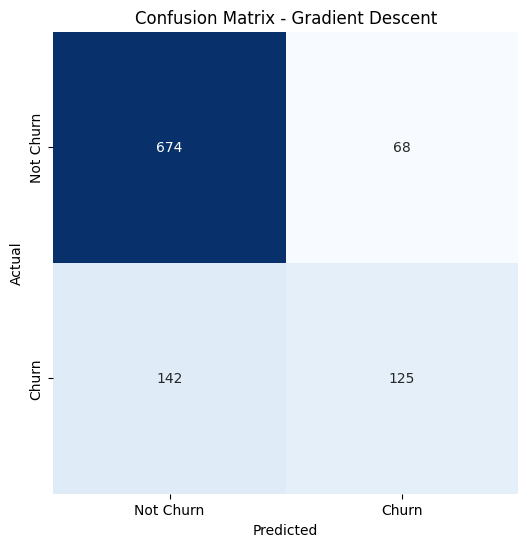

In [84]:
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model
}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train_encoded)

    # Make predictions
    y_pred = model.predict(x_test)

    # Create a confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not Churn', 'Churn'],
                yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

PLOT ROC CURVE

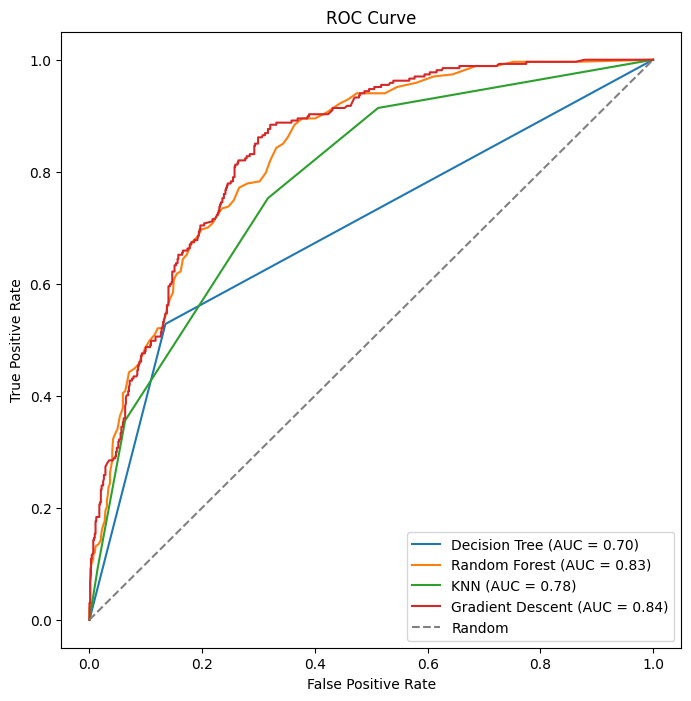

In [86]:
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model
}

plt.figure(figsize=(8, 8))

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train_encoded)

    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Despite the Decision Tree having the highest F1-score for the positive class at 0.56, the Gradient Descent model emerges as the best performing overall, boasting an AUC of 0.84. This high AUC value indicates that the Gradient Descent model has superior ability in distinguishing between the classes across various threshold settings. While the F1-score for class 1 is a crucial metric, the AUC provides a more comprehensive measure of the model's performance by considering both true positive and false positive rates. Therefore, the Gradient Descent model not only performs well in identifying the positive class but also demonstrates robust overall classification capabilities, making it the most reliable model for this task.

HYPERPARAMETER TUNING

In [95]:
params_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'feature_selection__k': [5, 10, 15],  
}

searcher = GridSearchCV(
    gradient_descent_model,
    param_grid=params_grid, 
    cv=5, scoring='f1'
)

# Fitting the searcher with train data
searcher.fit(GridSearchCV)

TypeError: Singleton array array(<class 'sklearn.model_selection._search.GridSearchCV'>, dtype=object) cannot be considered a valid collection.